In [1]:
from IPython.display import SVG, Image, HTML

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc

from sklearn.linear_model import SGDRegressor, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, make_circles, make_blobs, fetch_openml
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

from clustering_plot import plot_clustering

<!--- kim jestem, tytuł, o czym bedzie

# pozaznacza¢ istotne terminy/pojecia boldem
# GIThub link
# funkcje błedu/nagrody -->

# "Wprowadzenie do uczenia maszynowego"
<br>
<br>
<br>
Robert Różański

https://github.com/robaki/ML_intro_pres_jupyter

<!--- tradycyjne programowanie vs ML -->
* ## traditional programming:

    ### writing instructions that tell computer what to do, step by step

* ## machine learning:

    ### training a **model** on **data**, using **training algorithms** so that it can perform some task

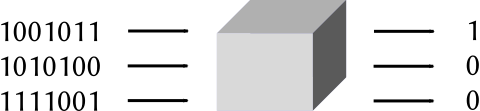

In [2]:
# ML model as a black box
SVG(filename='./obrazki/box_1.svg') 

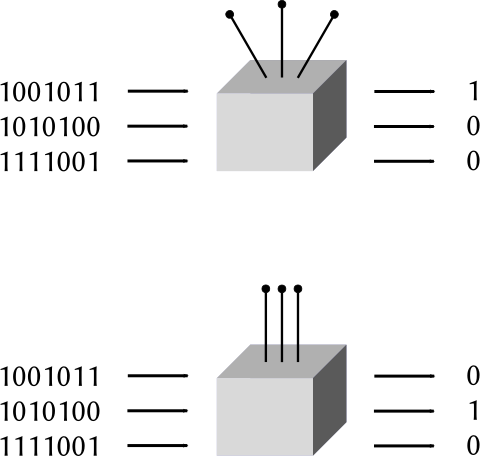

In [3]:
# parameters affect processing
SVG(filename='./obrazki/box_2.svg') 

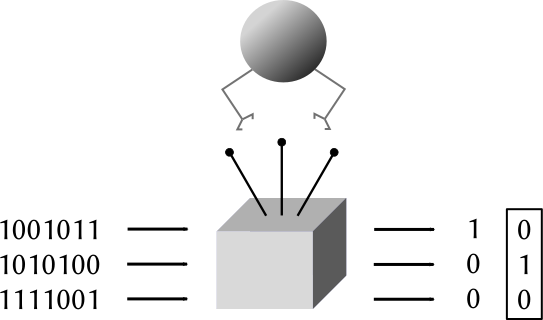

In [4]:
# supervised training: target and training algorithm
SVG(filename='./obrazki/box_3.svg') 

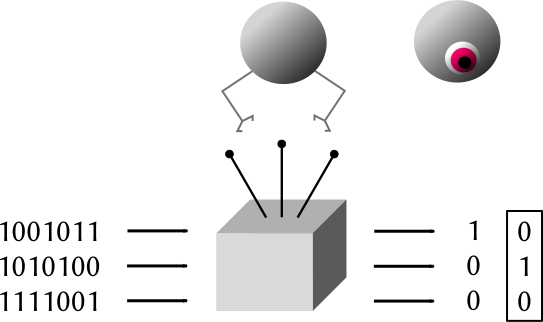

In [5]:
# supervised learning: scoring function
SVG(filename='./obrazki/box_4.svg') 

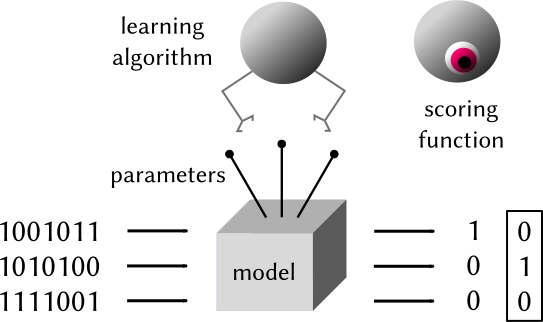

In [6]:
SVG(filename='./obrazki/box_4_with_explanations.svg')

In [7]:
def plot_example_non_linear(train_data, test_data, pipeline, fit_and_test=True, display_params=False, param_loc=[0,0], plot_model=True, plot_true_func=True):
    if fit_and_test:
        # fit and test model
        pipeline.fit(train_data[['X']], train_data['y'])

        y_pred = pipeline.predict(test_data[['X']])
        mse = mean_squared_error(test_data['y'], y_pred)
        r_2 = r2_score(test_data['y'], y_pred)

    # plot
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    plt.tight_layout()
    plt.ylabel('y')
    plt.xlabel('x')

    ax.scatter(train_data['X'], train_data['y'], marker='o', c='g', label='train set')
    
    if plot_model:
        plt.plot(test_data['X'], y_pred, label="model's prediction")
    
    if plot_true_func:
        plt.plot(test_data['X'], test_data['y'], label="True function")

    if display_params:
        ax.text(param_loc[0], param_loc[1], 'a: %s   b: %f' % (str(pipeline[1].coef_), pipeline[1].intercept_), fontsize=15)
        ax.text(param_loc[0], param_loc[1] + 0.1, 'mse: %f  r^2: %f' % (mse, r_2), fontsize=15)

    plt.legend()
    mpl.pyplot.close("all")
    
    return fig

def true_fun_cos(X):
    return np.cos(1.5 * np.pi * X)

def true_fun_lin(X):
    return X*1.5

In [8]:
np.random.seed(0)

true_fun = true_fun_lin
n_samples = 30
degree = 1

polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([
    ("polynomial_features", polynomial_features), 
    ("linear_regression", linear_regression),
])

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
train_data = pd.DataFrame({'X':X, 'y':y})

test_data = pd.DataFrame({'X':np.linspace(0, 1, 100)})
test_data['y'] = true_fun(test_data['X'])

# Supervised Learning - Regression

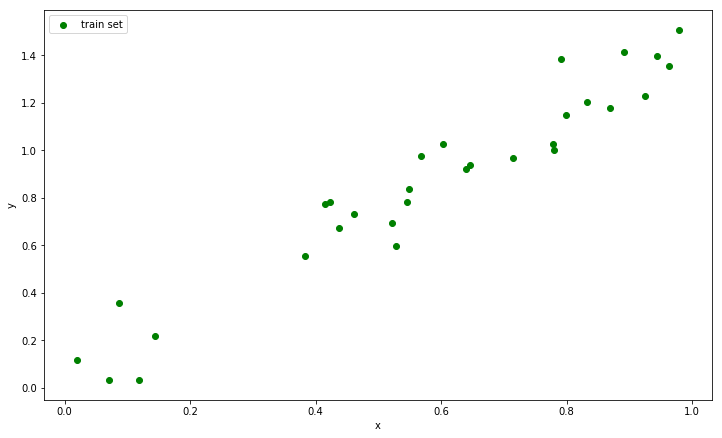

In [9]:
plot_example_non_linear(train_data, None, None, fit_and_test=False, display_params=False, param_loc=[0,0], plot_model=False, plot_true_func=False)

In [10]:
a_guess = 0.5
b_guess = 0.5
lr = 0.1

# SGD animated - code
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.ylabel('y')
plt.xlabel('X')

scat = ax.scatter(train_data['X'], train_data['y'], marker='o', c='g', label='train_set')
line, = ax.plot([], [], lw=2)
time_text_ab = ax.text(0, 1, 'a: %f   b: %f' % (a_guess, b_guess), fontsize=15)

y_pred = train_data['X']*a_guess + b_guess
time_text_scores = ax.text(0, 0.8, 'mse: %f   r^2: %f' % (mean_squared_error(train_data['y'], y_pred), r2_score(train_data['y'], y_pred)), fontsize=15)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    global a_guess, b_guess

    y_pred = train_data['X']*a_guess + b_guess
    line.set_data(train_data['X'], y_pred)
    time_text_ab.set_text('a: %f   b: %f' % (a_guess, b_guess))
    time_text_scores.set_text('mse: %f   r^2: %f' % (mean_squared_error(train_data['y'], y_pred), r2_score(train_data['y'], y_pred)))
    
    dxdb = 2 * (y_pred - train_data['y'])
    dxda = train_data['X'] * dxdb
    
    a_guess -= lr * dxda.mean()
    b_guess -= lr * dxdb.mean()
    
    return (line,)

mpl.pyplot.close("all")

In [11]:
# Stochastic Grdient Descent animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)
HTML(anim.to_html5_video())

In [12]:
np.random.seed(0)

true_fun = true_fun_cos
n_samples = 30
degree = 1

polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()

pipeline = Pipeline([
    ("polynomial_features", polynomial_features), 
    ("linear_regression", linear_regression),
])

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
train_data = pd.DataFrame({'X':X, 'y':y})

test_data = pd.DataFrame({'X':np.linspace(0, 1, 100)})
test_data['y'] = true_fun(test_data['X'])

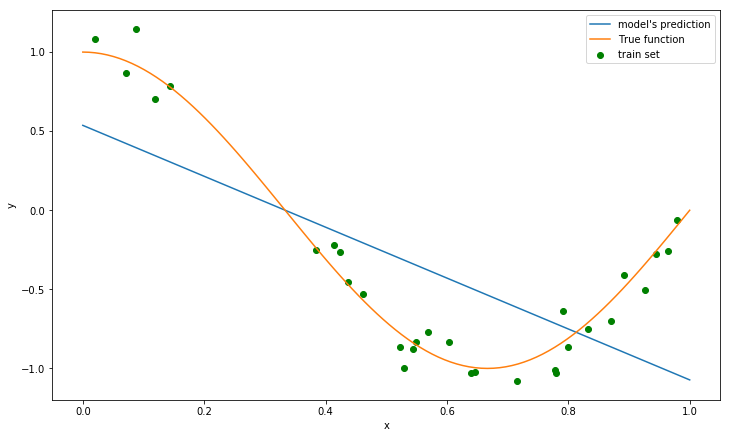

In [13]:
plot_example_non_linear(train_data, test_data, pipeline, display_params=False, param_loc=[0,0], plot_model=True, plot_true_func=True)

In [14]:
np.random.seed(0)

true_fun = true_fun_cos
n_samples = 30
degree = 3

polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([
    ("polynomial_features", polynomial_features), 
    ("linear_regression", linear_regression),
])

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
train_data = pd.DataFrame({'X':X, 'y':y})

test_data = pd.DataFrame({'X':np.linspace(0, 1, 100)})
test_data['y'] = true_fun(test_data['X'])

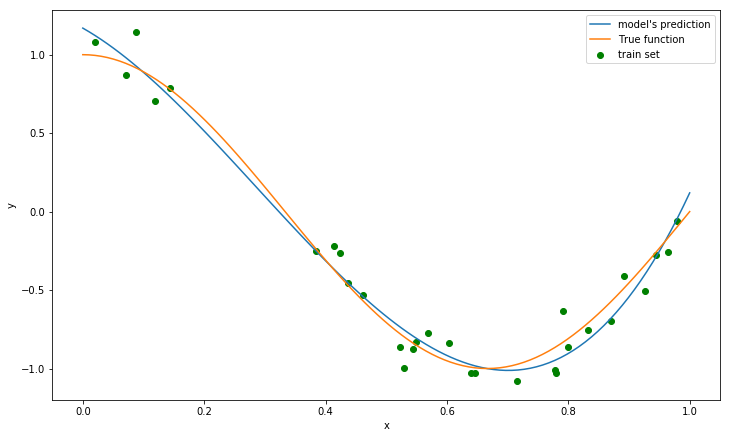

In [15]:
plot_example_non_linear(train_data, test_data, pipeline, display_params=False, param_loc=[0,0], plot_model=True, plot_true_func=True)

In [16]:
np.random.seed(0)

true_fun = true_fun_cos
n_samples = 30
degree = 13

polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([
    ("polynomial_features", polynomial_features), 
    ("linear_regression", linear_regression),
])

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
train_data = pd.DataFrame({'X':X, 'y':y})

test_data = pd.DataFrame({'X':np.linspace(0, 1, 100)})
test_data['y'] = true_fun(test_data['X'])

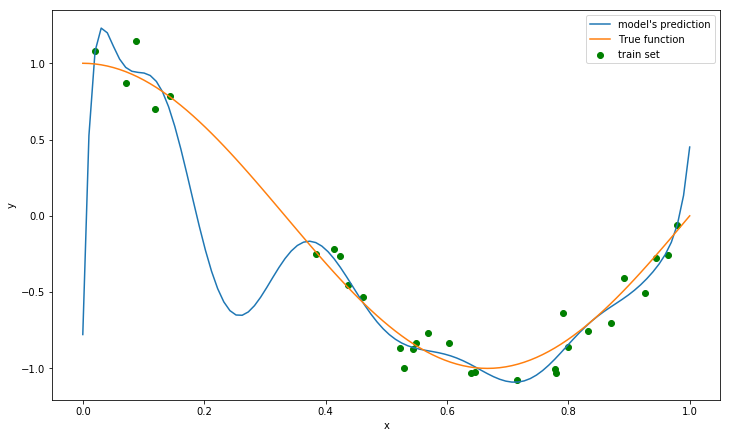

In [17]:
plot_example_non_linear(train_data, test_data, pipeline, display_params=False, param_loc=[0,0], plot_model=True, plot_true_func=True)

# Supervised Learning - Classification

In [18]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=0)
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

lr = LogisticRegression(solver='lbfgs')
lr.fit(df[['x1', 'x2']], df['y'])

x1_decision_bound = np.linspace(df['x1'].min(), df['x1'].max(), 100)
x2_decision_bound = - (lr.intercept_ + np.dot(lr.coef_[0][0], x1_decision_bound)) / lr.coef_[0][1]

In [19]:
def plot_logistic_cls(df, x1_decision_bound, x2_decision_bound):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    plt.tight_layout()
    plt.ylabel('x1')
    plt.xlabel('x2')

    for cls_ in df['y'].unique():
        df_tmp = df[df['y'] == cls_]
        ax.scatter(df_tmp['x1'], df_tmp['x2'], marker='o', label='class %i' % cls_)

    if (not x1_decision_bound is None) or (not x2_decision_bound is None) :
        ax.plot(x1_decision_bound, x2_decision_bound, label='decision boundary')

    plt.legend()
    mpl.pyplot.close("all")
    
    return fig

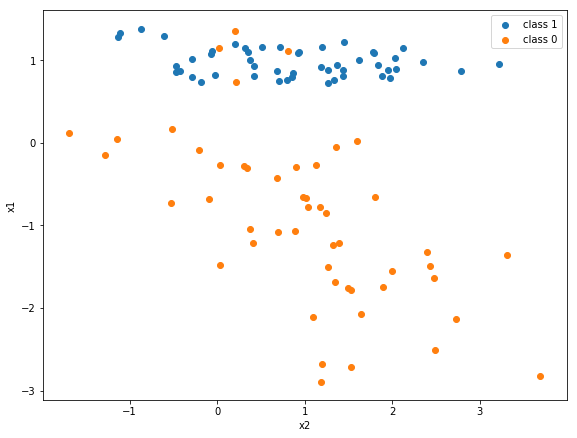

In [20]:
plot_logistic_cls(df, None, None)

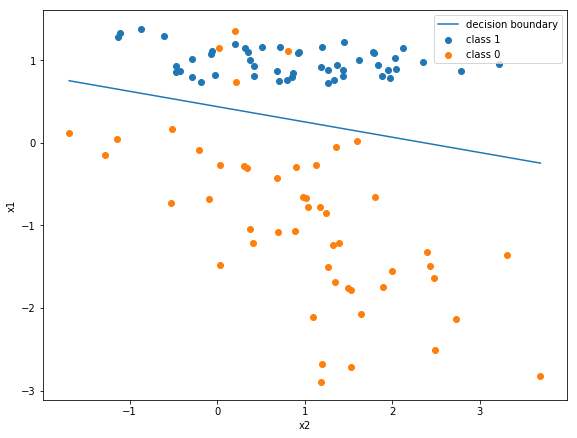

In [21]:
plot_logistic_cls(df, x1_decision_bound, x2_decision_bound)

In [22]:
X, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.5)

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

lr = LogisticRegression(solver='lbfgs')
lr.fit(df[['x1', 'x2']], df['y'])

x1_decision_bound = np.linspace(df['x1'].min(), df['x1'].max(), 100)
x2_decision_bound = - (lr.intercept_ + np.dot(lr.coef_[0][0], x1_decision_bound)) / lr.coef_[0][1]

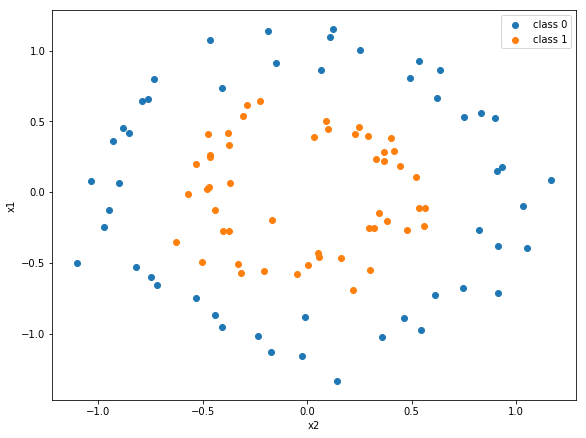

In [23]:
# harder problem - not linearly separable
plot_logistic_cls(df, None, None)

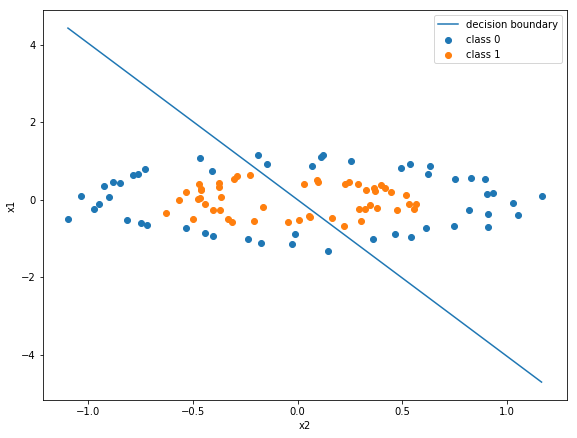

In [24]:
plot_logistic_cls(df, x1_decision_bound, x2_decision_bound)

# Another type of model: Decision Tree

In [25]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(df[['x1', 'x2']], df['y'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
h = 0.02
x1_min, x1_max = df['x1'].min() - .5, df['x1'].max() + .5
x2_min, x2_max = df['x2'].min() - .5, df['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

Z = tree_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

In [27]:
def plot_tree_cls(df, Z, xx, yy):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    plt.tight_layout()
    plt.ylabel('x1')
    plt.xlabel('x2')

    for cls_ in df['y'].unique():
        df_tmp = df[df['y'] == cls_]
        ax.scatter(df_tmp['x1'], df_tmp['x2'], marker='o', label='class %i' % cls_)

    if not Z is None:
        ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.3)

    plt.legend()
    mpl.pyplot.close("all")
    
    return fig

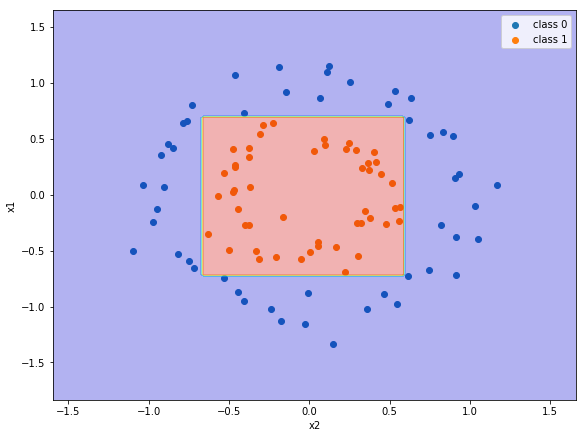

In [28]:
plot_tree_cls(df, Z, xx, yy)

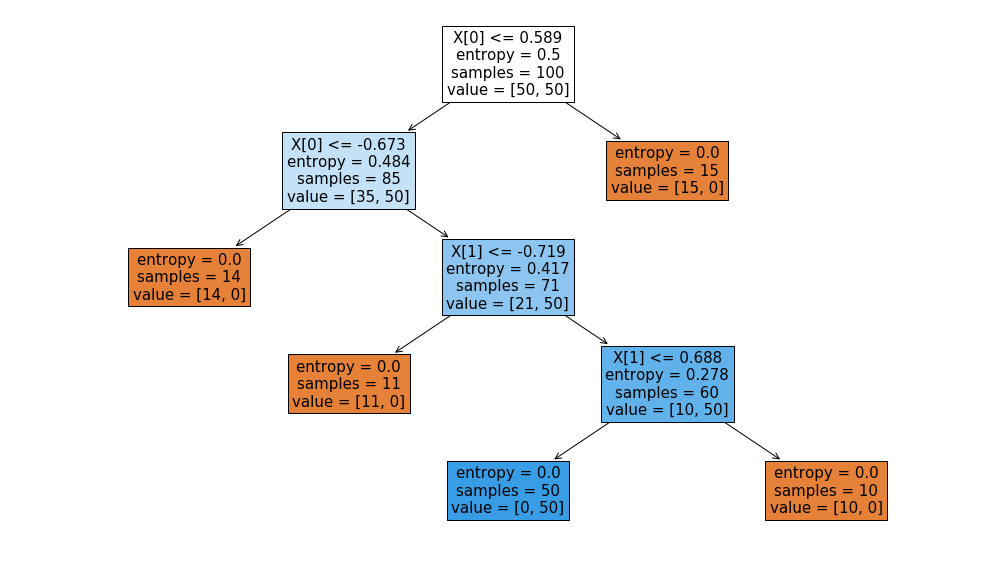

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.tight_layout()

plot_tree(tree_clf, filled=True, fontsize=15)

plt.show()

In [30]:
# TODO regresja drzewa decyzyjne

In [31]:
X, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.8)

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

lr = LogisticRegression(solver='lbfgs')
lr.fit(df[['x1', 'x2']], df['y'])

x1_decision_bound = np.linspace(df['x1'].min(), df['x1'].max(), 100)
x2_decision_bound = - (lr.intercept_ + np.dot(lr.coef_[0][0], x1_decision_bound)) / lr.coef_[0][1]

In [32]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(df[['x1', 'x2']], df['y'])

h = 0.02
x1_min, x1_max = df['x1'].min() - .5, df['x1'].max() + .5
x2_min, x2_max = df['x2'].min() - .5, df['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

Z = tree_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

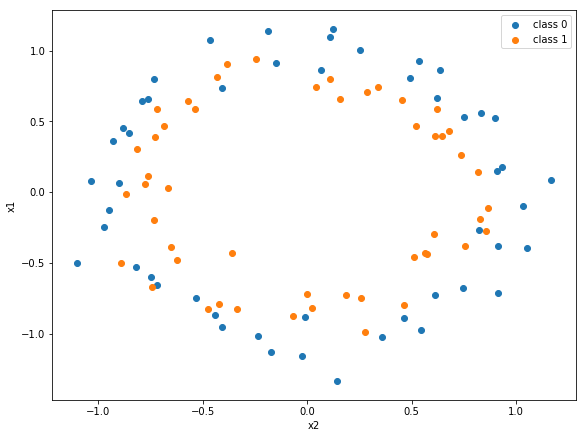

In [33]:
# harder problem
plot_tree_cls(df, None, None, None)

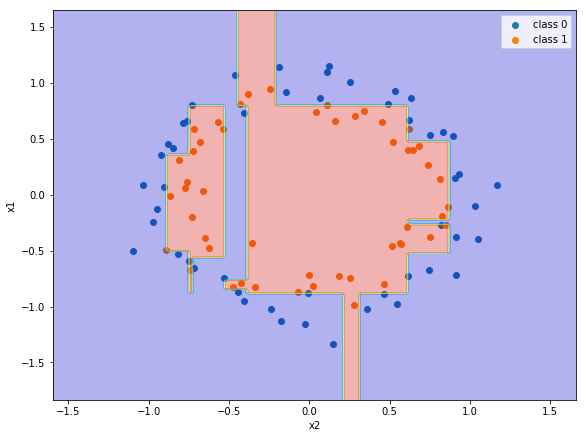

In [34]:
plot_tree_cls(df, Z, xx, yy)

# Ensemble Learning (voting) using Random Forest Classifier

In [35]:
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(df[['x1', 'x2']], df['y'])

h = 0.02
x1_min, x1_max = df['x1'].min() - .5, df['x1'].max() + .5
x2_min, x2_max = df['x2'].min() - .5, df['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

Z = forest_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

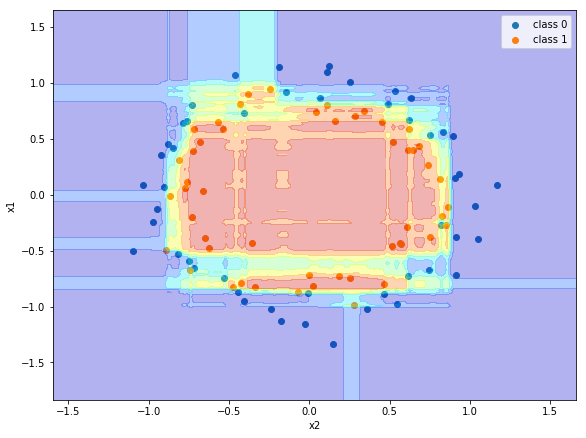

In [36]:
plot_tree_cls(df, Z, xx, yy)

# Hyperparameters, Crossvalidation and Grid Search

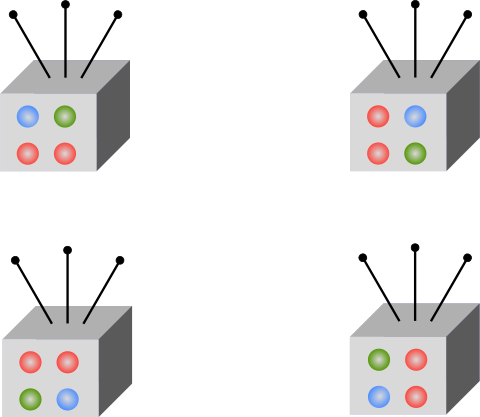

In [37]:
SVG(filename='./obrazki/box_5_hyperparams.svg')

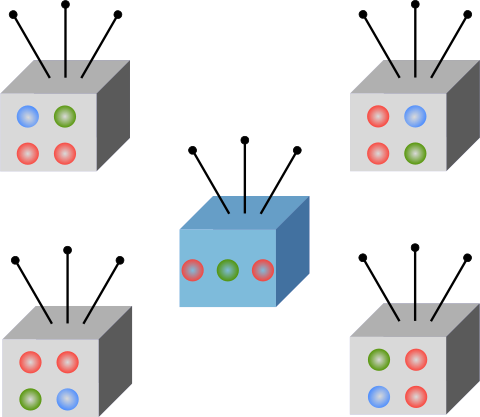

In [38]:
SVG(filename='./obrazki/box_5_mult_models.svg')

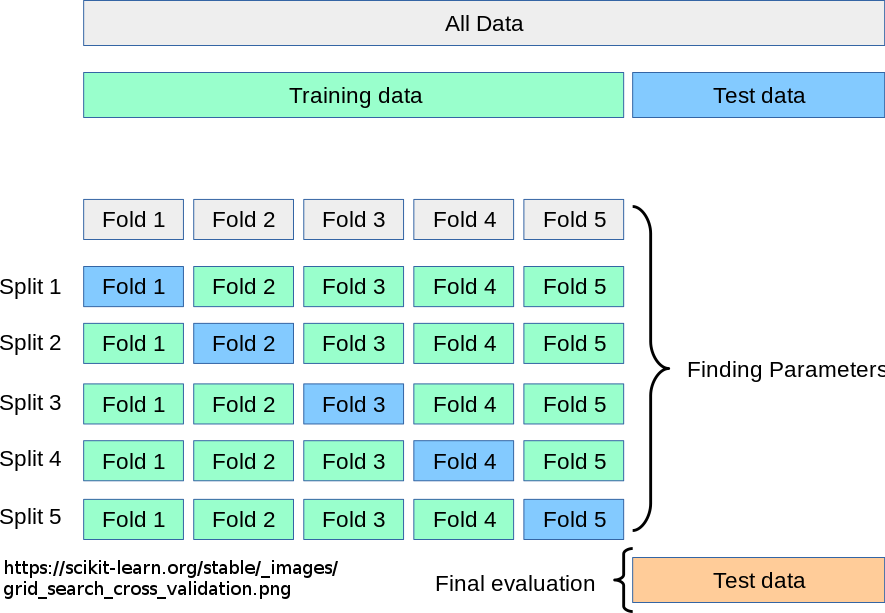

In [39]:
Image(filename='obrazki/grid_search_cross_validation.png')

In [40]:
X, y = make_classification(n_samples=100, n_features=10, n_informative=4, n_redundant=4, n_repeated=0, n_classes=4, n_clusters_per_class=3, weights=None, flip_y=0.01, class_sep=0.8, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=0)
df = pd.DataFrame(X, columns=['x%i' % x for x in range(X.shape[1])])
df['y'] = y

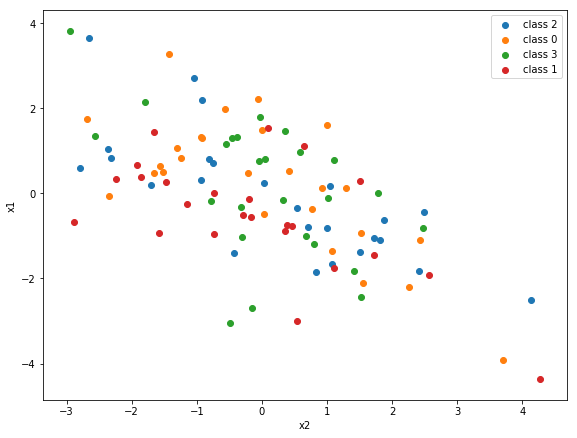

In [41]:
# some hard clf data
plot_tree_cls(df, None, None, None)

In [42]:
forest_clf = RandomForestClassifier()

hyperparam_grid = {
    "n_estimators":[3**x for x in range(6)],
    "max_depth": [1, 3, 9, 12, None],
    "max_features": [1, 3, 9, None],
    "min_samples_split": [2, 3, 10],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

print(np.prod([len(v) for v in hyperparam_grid.values()])) # nb. of combinations

# run grid search
grid_search = GridSearchCV(
    forest_clf, 
    param_grid=hyperparam_grid, 
    cv=5, 
    iid=False, return_train_score=True, 
    scoring='f1_weighted', n_jobs=-1, refit=True)

_ = grid_search.fit(X, y)

df_res = pd.DataFrame(grid_search.cv_results_)

1440


In [43]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 9,
 'min_samples_split': 10,
 'n_estimators': 81}

In [44]:
grid_search.best_score_

0.47760103722509734

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
plt.tight_layout()
plt.ylabel('frequency')
plt.xlabel('f1 weighted score (CV test mean)')

df_res['mean_test_score'].hist(bins=50)

mpl.pyplot.close("all")

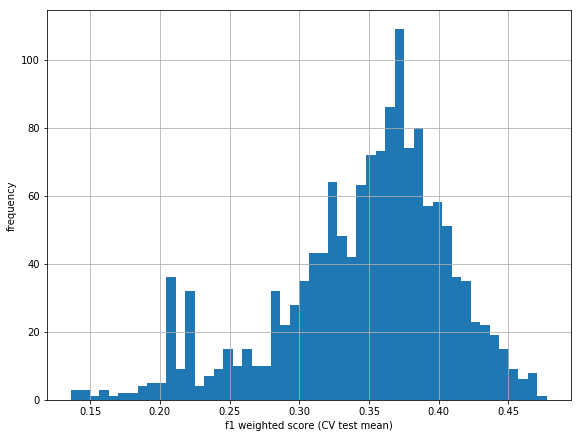

In [46]:
fig

### Grid Search checks all combinations (that can be a lot!)

   ### Random Search checks some nb. of combinations randomly

### more advanced Search tools try to make the search more efficient

In [47]:
# TODO: in future versions add data preprocessing: standarisation, normalization, scaling
# also cleaning, inputing, over/undersampling

# feature engineering

### adding features: e.g. PolynomialFeatures

### reducing nb. of features: e.g. Principle Component Analysis (PCA)

In [48]:
# linear data
X = np.array(range(5)).reshape(-1, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [49]:
# generating new features from data
# PolynomialFeatures allows to learn non-linear patterns from linear data
polynomial_features = PolynomialFeatures(degree=5, include_bias=False)
polynomial_features.fit_transform(X)

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01, 2.430e+02],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02, 1.024e+03]])

In [50]:
# create gaussian cloud
X = np.random.normal(size=[500,2])

# skew the samples
A = np.array([[1, 1], [0, 1]])
X = np.dot(X, A.T)

df = pd.DataFrame(X, columns=['x1', 'x2'])

# do PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=['x1', 'x2'])

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
plt.tight_layout()

df.plot.scatter(x='x1', y='x2', ax=ax)

mpl.pyplot.close("all")

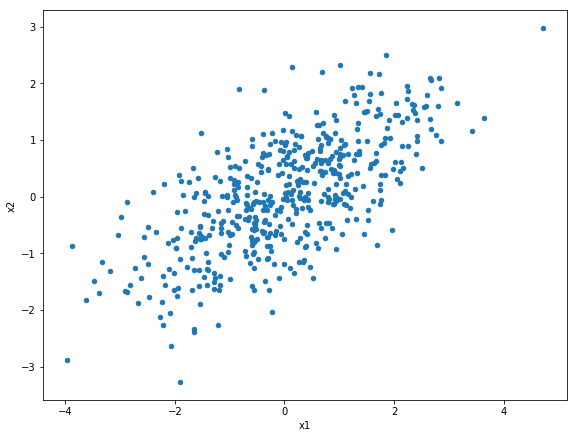

In [52]:
fig # data for Principle Component Analysis

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
plt.tight_layout()

df.plot.scatter(x='x1', y='x2', ax=ax)

axis = pca.components_.T
axis /= axis.std()
x_axis, y_axis = axis

quiver_x1 = df['x1'].mean()
quiver_x2 = df['x2'].mean()

ax.quiver(quiver_x1, quiver_x2, x_axis, y_axis, zorder=11, width=0.005, scale=6)

mpl.pyplot.close("all")

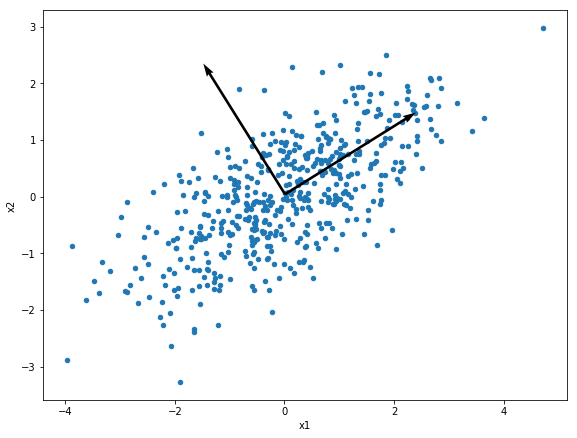

In [54]:
fig # Principle Components

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
plt.tight_layout()

df_pca.plot.scatter(x='x1', y='x2', ax=ax)

mpl.pyplot.close("all")

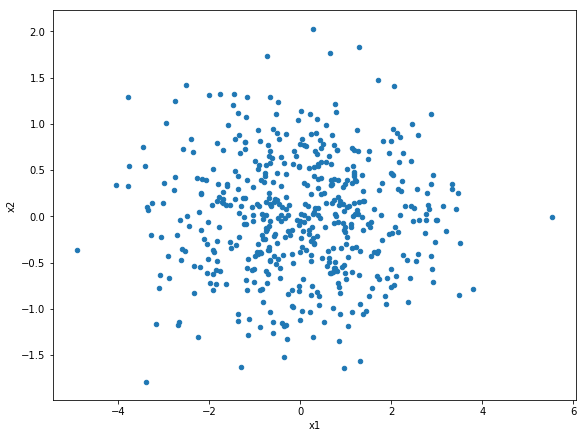

In [56]:
fig # data after transformation by the PCA

# Feature Learning and Neural Networks

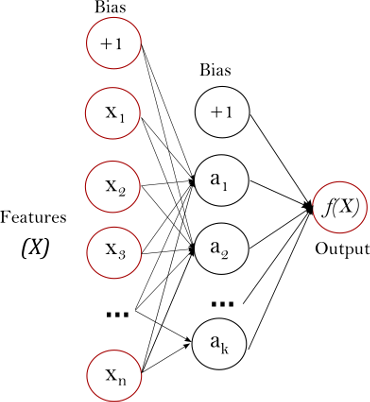

In [57]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
Image(filename='obrazki/multilayerperceptron_network.png')

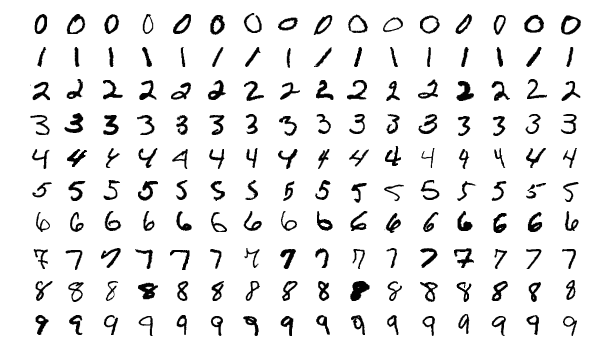

In [58]:
# https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png
Image(filename='obrazki/MnistExamples.png')

In [59]:
# adapted from: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 50), 
    max_iter=100, alpha=1e-4,
    solver='lbfgs', verbose=10, 
    tol=1e-4, random_state=1)

mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [60]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(8, 6)
plt.tight_layout()
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

mpl.pyplot.close("all")

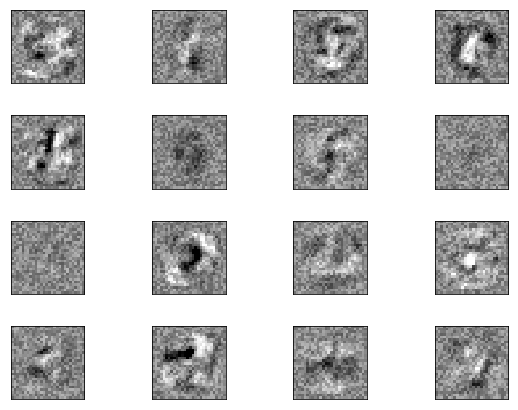

In [61]:
# Feature map (weights)
fig

# Semisupervised Learning
<!-- uzupełnij kiedys, jako przykład Transfer Learning -->

# Unsupervised Learning

### Technically PCA is a type of unsupervised learning too

### Another type of Unsupervised Learning: Clustering

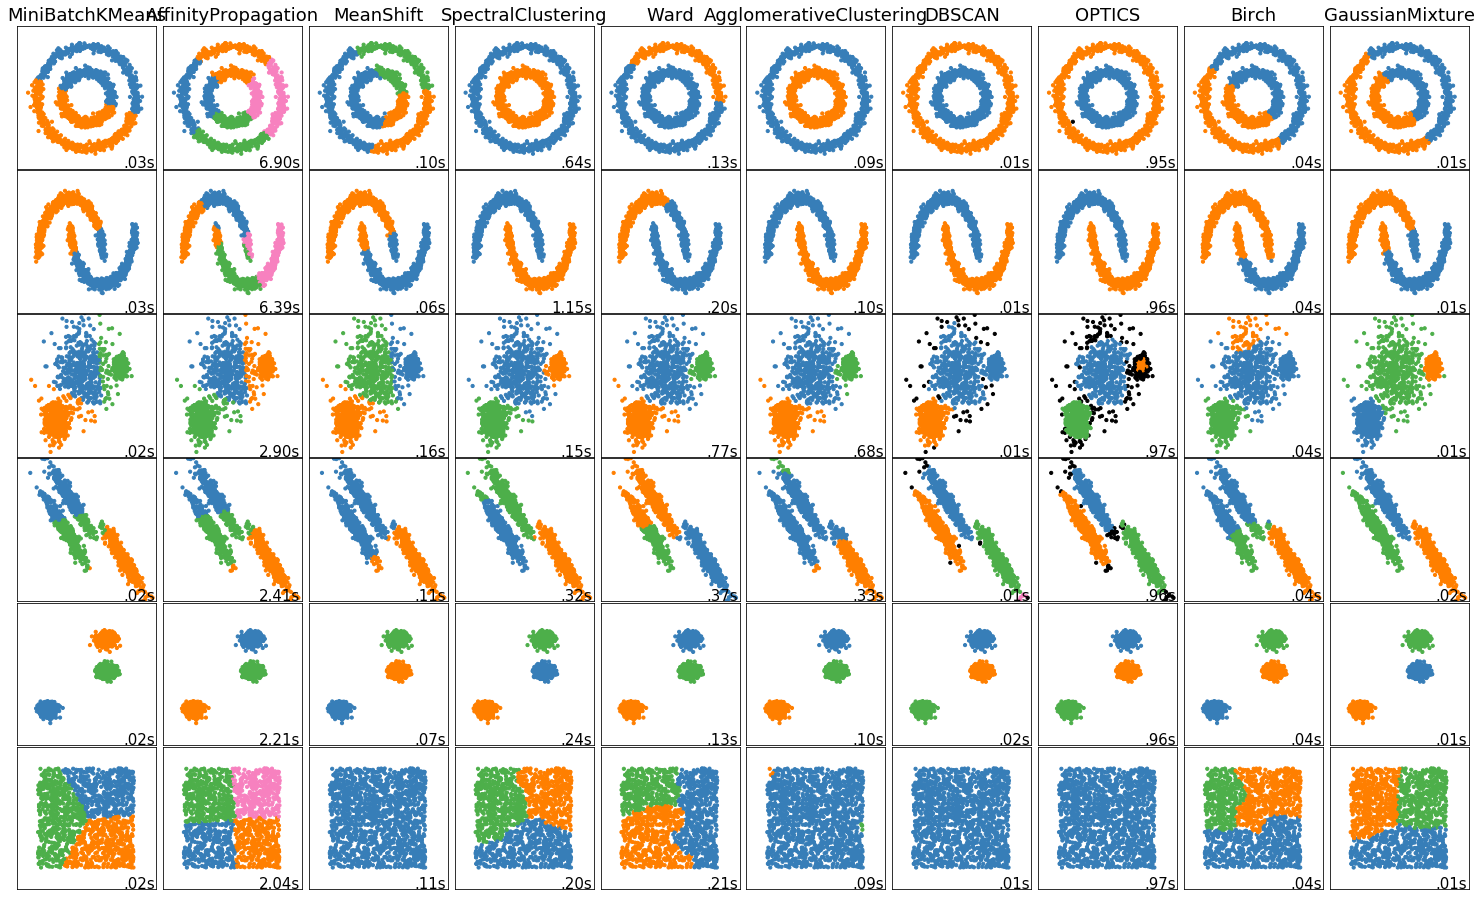

In [62]:
plot_clustering()

# What to do next?

* one book to rule them all (at least now):
    
    "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow" Aurélien Géron

* internet resources:
    
    * scikit-learn.org
    * tinyurl.com/hs-data-science
    * YT stat quest (statistics & ML): youtube.com/user/joshstarmer
    * YT 3Blue1Brown (maths & ML): youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw
    * Talking Machines (ML podcast)
    * kaggle.com (datasets & competitions)

* key tools (in python stack):
    
    * scikit (standard ML tools, toy data, etc.)
    * pandas & numpy (data handling)
    * matplotlib & pyplot (vizualisation)
    * keras (neural networks)